In [1]:
import numpy as np #biblioteca utilizada para trabalhar com vetores
import pandas as pd #biblioteca para trabalhar com dataframes (planilhas excel)
import seaborn as sns #biblioteca utilizada para criar gráficos mais "bonitos"
import matplotlib.pyplot as plt #biblioteca para criar gráficos "comuns" ao estilo Matlab

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#importando o banco de dados a ser utilizado (comando necessário para o google colab)
from google.colab import files
uploaded = files.upload()   

Saving wholesale_customers_data.csv to wholesale_customers_data.csv


In [38]:
# abrir o arquivo csv que contém os dados a serem utilizados durante a prática
uci_customers = pd.read_csv('wholesale_customers_data.csv')
uci_customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


1. FRESH: total anual gasto em produtos frescos;
2. MILK: total anual gasto em produtos derivados do leite;
3. GROCERY: total anual gasto em produtos de supermercado;
4. FROZEN: total anual gasto em produtos congelados;
5. DETERGENTS_PAPER: total anual gasto em produtos de limpeza;
6. DELICATESSEN: total anual gasto em produtos de delicatessen;
7. CHANNEL: tipo do canal de compra do consumidor (1- Horeca(hotel/restaurante/cafés) 2- varejo)
8. REGION: região do consumidor


In [4]:
# (rows,columns)
uci_customers.shape

(440, 8)

In [5]:
uci_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
# verificar a qtd de dados null
uci_customers.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
uci_customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


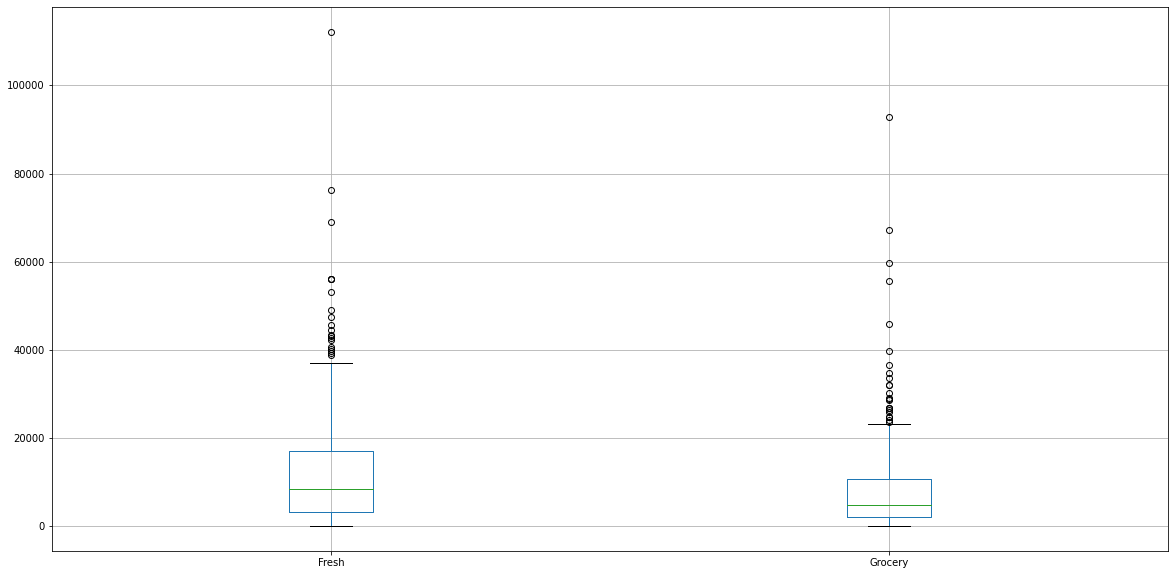

In [8]:
# verificando se há outliers na coluna Fresh e Grocery
plt.figure(figsize=(20,10))
uci_customers.boxplot(column=['Fresh','Grocery'])  

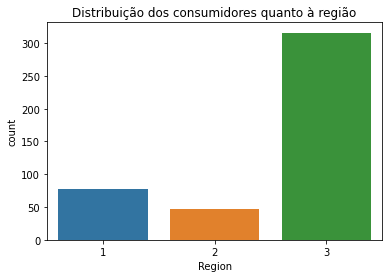

In [9]:
#analisando a distribuição dos clientes por regiao
sns.countplot(x='Region', data=uci_customers); # cria o gráfico que conta a quantidade de consumidores existente em cada uma das regiões
plt.title('Distribuição dos consumidores quanto à região');  #adiciona o título no gráfico

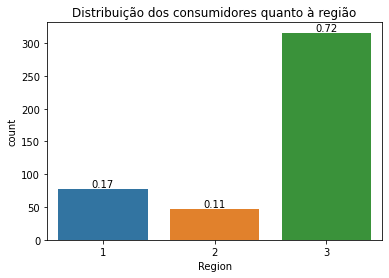

In [10]:
#analisando a distribuição dos clientes por regiao
total = float(len(uci_customers))
ax = sns.countplot(x='Region', data=uci_customers); # cria o gráfico que conta a quantidade de consumidores existente em cada uma das regiões
plt.title('Distribuição dos consumidores quanto à região');  #adiciona o título no gráfico
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 


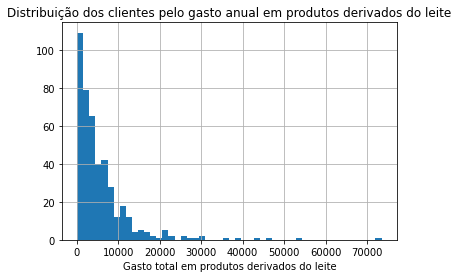

In [11]:
#analisando a distribuição dos clientes quanto ao total de gastos com produtos derivados do leite através do histograma
uci_customers.hist('Milk', bins=50);  #seleciona a coluna de total de gastos para realizar o histograma
                                 # os "bins" indicam a quantidade de grupos que se deseja dividir os dados
plt.title('Distribuição dos clientes pelo gasto anual em produtos derivados do leite');# adiciona o título ao gráfico (histograma)
plt.xlabel('Gasto total em produtos derivados do leite');

In [12]:
uci_customers[uci_customers['Milk'] > 20000].shape[0]*100/uci_customers.shape[0]


4.545454545454546

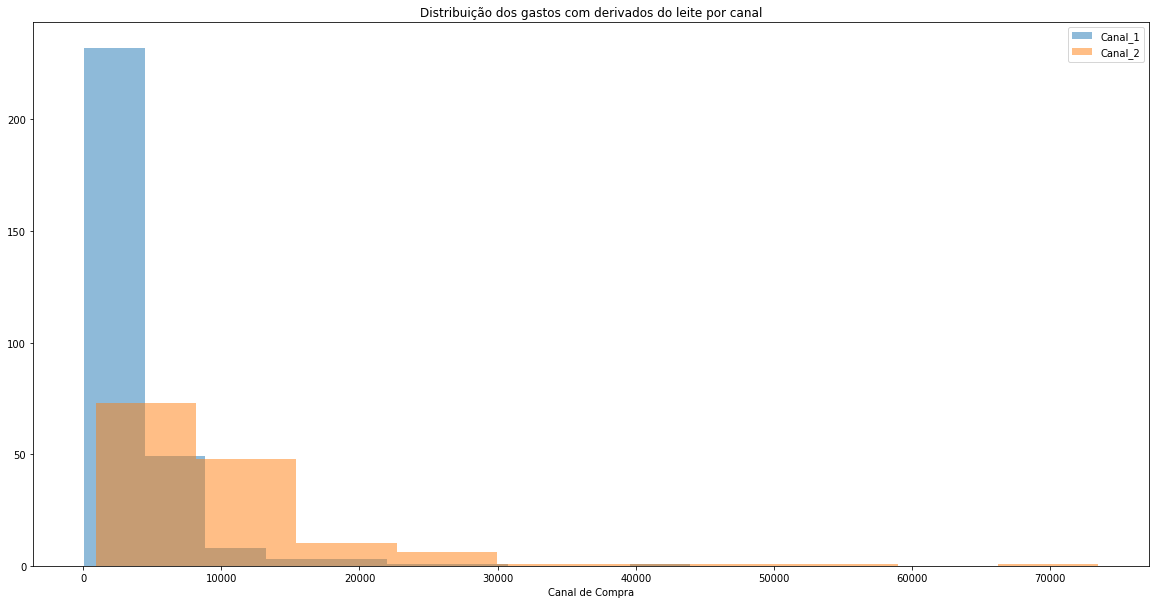

In [13]:
plt.figure(figsize=(20,10))
canal_1=uci_customers[uci_customers['Channel']==1] #seleciona o canal 1
canal_2= uci_customers[uci_customers['Channel']==2] #seleciona a comunicação pelo canal 2
plt.hist('Milk', data=canal_1, alpha=0.5, label='Canal_1'); #cria o histograma apenas do canal 1
plt.hist('Milk', data=canal_2, alpha=0.5, label='Canal_2'); #cria o histograma apenas para o canal 2
plt.title('Distribuição dos gastos com derivados do leite por canal'); #adiciona o título ao gráfico
plt.xlabel('Canal de Compra'); # adiciona o label para o eixo x
plt.legend(); #adiciona a legenda

In [14]:
clientes_1 = canal_1[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].sum().sum()
clientes_2 = canal_2[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].sum().sum()
print(clientes_1, clientes_2)

7999569 6619931


In [69]:
cli1 = canal_1[canal_1['Milk'] < 10000].shape[0]
cli2 = canal_2[canal_2['Milk'] < 10000].shape[0]
print(cli1,cli2)

284 90


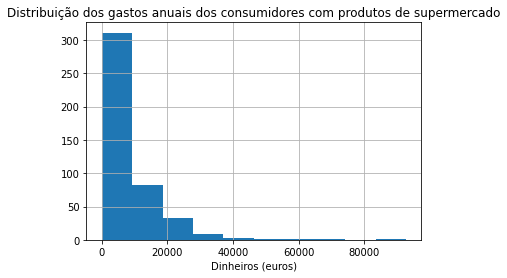

In [16]:
uci_customers.hist('Grocery');  #criando um histograma para os os gastos totais dos consumidores com produtos de supermercado
plt.title('Distribuição dos gastos anuais dos consumidores com produtos de supermercado'); #adiciona o título no gráfico
plt.xlabel('Dinheiros (euros)'); # adiciona o label do eixo X


In [17]:
grocery_inferior = uci_customers[uci_customers['Grocery'] <= 20000].shape[0]
grocery_superior = uci_customers[uci_customers['Grocery'] > 60000].shape[0]
grocery_median = uci_customers[(uci_customers['Grocery'] >= 40000) & (uci_customers['Grocery'] <= 60000)].shape[0]
print(grocery_inferior, grocery_superior,grocery_median)

402 2 3


77 47 316


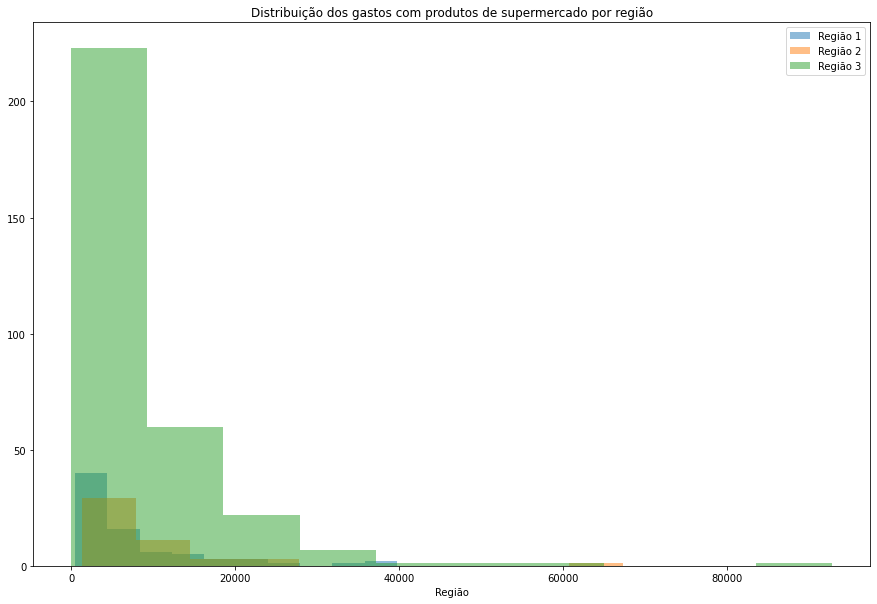

In [18]:
plt.figure(figsize=(15,10))


regiao_1=uci_customers[uci_customers['Region'] == 1]
regiao_2=uci_customers[uci_customers['Region'] == 2]
regiao_3=uci_customers[uci_customers['Region'] == 3]

plt.hist('Grocery', data=regiao_1, alpha=0.5, label='Região 1');
plt.hist('Grocery', data=regiao_2, alpha=0.5, label='Região 2');
plt.hist('Grocery', data=regiao_3, alpha=0.5, label='Região 3');

plt.title('Distribuição dos gastos com produtos de supermercado por região');
plt.xlabel('Região');
plt.legend();
print(regiao_1.shape[0], regiao_2.shape[0], regiao_3.shape[0])

In [19]:
grocery_reg1 = regiao_1['Grocery'].sum().sum()
grocery_reg2 = regiao_2['Grocery'].sum().sum()
grocery_reg3 = regiao_3['Grocery'].sum().sum()
print(grocery_reg1, grocery_reg2, grocery_reg3)

570037 433274 2495251


In [20]:
#obtém os dados de cada um dos consumidores em cada região
regiao_1=uci_customers[uci_customers['Region'] == 1]
regiao_2=uci_customers[uci_customers['Region'] == 2]
regiao_3=uci_customers[uci_customers['Region'] == 3]

# obtém os valores médios atribuídos a cada uma das regiões
print('Valor anual médio gasto pelos clientes da região 1: \n',regiao_1[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].mean()) #imprime o valor médio para a região 1
print('Valor anual médio gasto pelos clientes da região 2: \n',regiao_2[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].mean()) #imprime o valor médio para a região 2
print('Valor anual médio gasto pelos clientes da região 3: \n',regiao_3[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].mean()) #imprime o valor médio para a região 3

Valor anual médio gasto pelos clientes da região 1: 
 Fresh               11101.727273
Milk                 5486.415584
Grocery              7403.077922
Frozen               3000.337662
Detergents_Paper     2651.116883
Delicassen           1354.896104
dtype: float64
Valor anual médio gasto pelos clientes da região 2: 
 Fresh               9887.680851
Milk                5088.170213
Grocery             9218.595745
Frozen              4045.361702
Detergents_Paper    3687.468085
Delicassen          1159.702128
dtype: float64
Valor anual médio gasto pelos clientes da região 3: 
 Fresh               12533.471519
Milk                 5977.085443
Grocery              7896.363924
Frozen               2944.594937
Detergents_Paper     2817.753165
Delicassen           1620.601266
dtype: float64


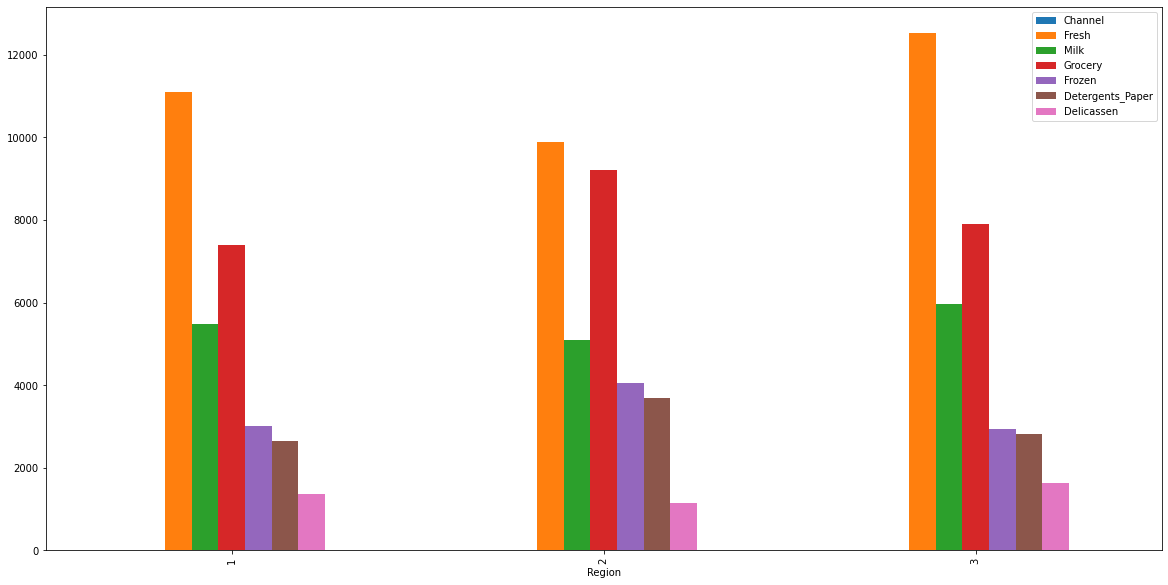

In [21]:
#média dos gastos por cada uma das regiões e tipo de produto consumido
df_customers_mean=uci_customers.groupby('Region').mean() #agrupa por região e obtém os valores médios
df_customers_mean.plot(kind='bar',figsize=(20,10))  #realiza o plot 

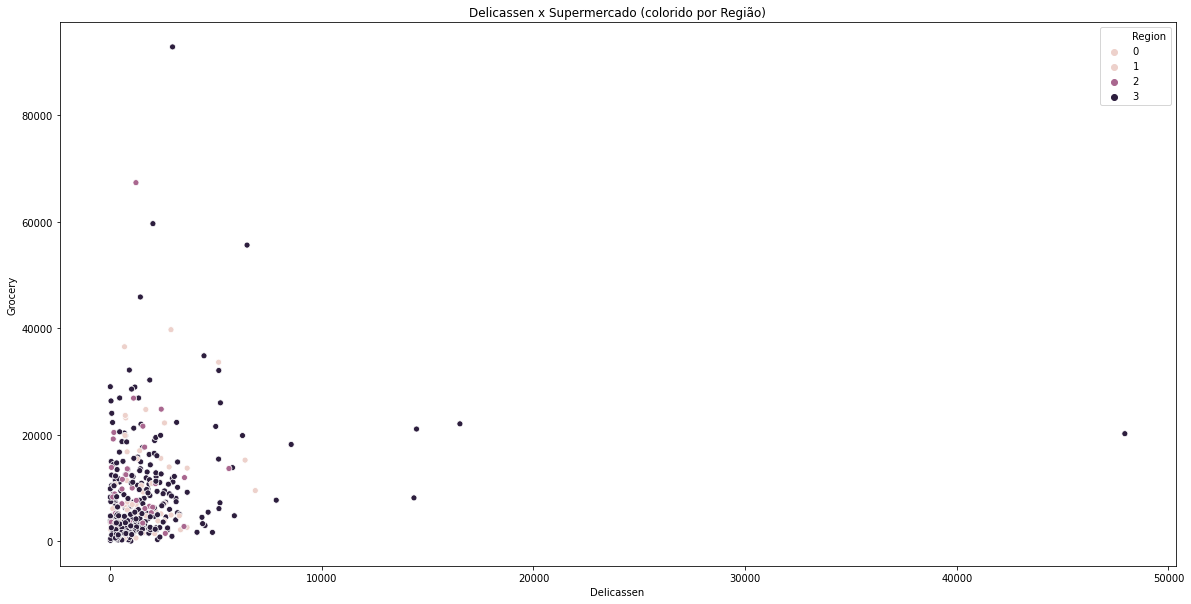

In [22]:
plt.figure(figsize=(20,10))

sns.scatterplot('Delicassen', 'Grocery', hue='Region', data=uci_customers); #realiza o plot do gráfico dos gastos em supermercado com o 
plt.title('Delicassen x Supermercado (colorido por Região)'); #adiciona o título ao gráfico

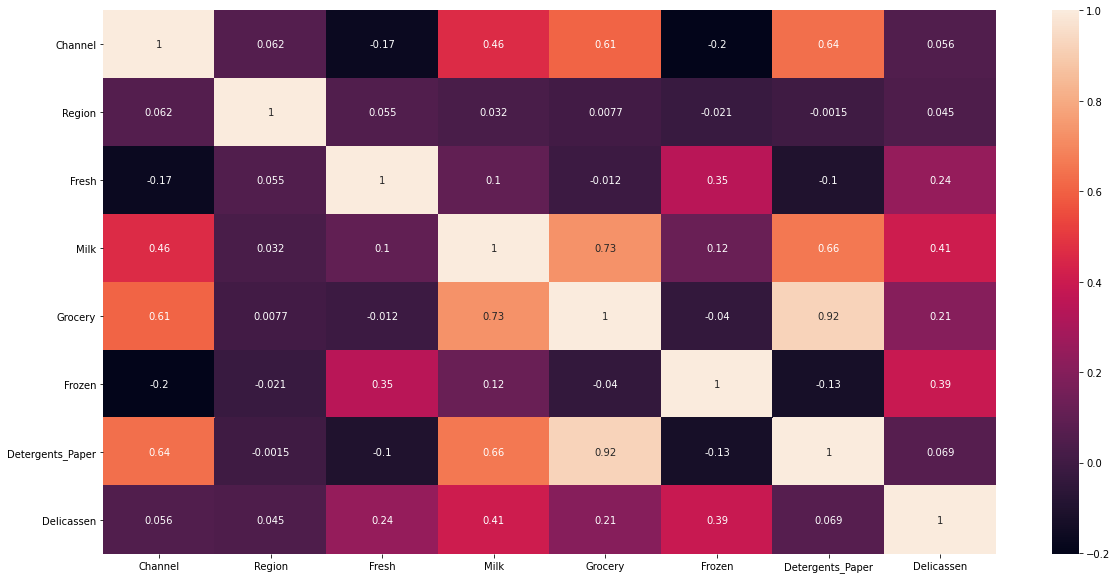

In [23]:
plt.figure(figsize=(20,10))

sns.heatmap(uci_customers.corr(), annot=True) # desenha a matriz de correlação entre cada um dos dados 

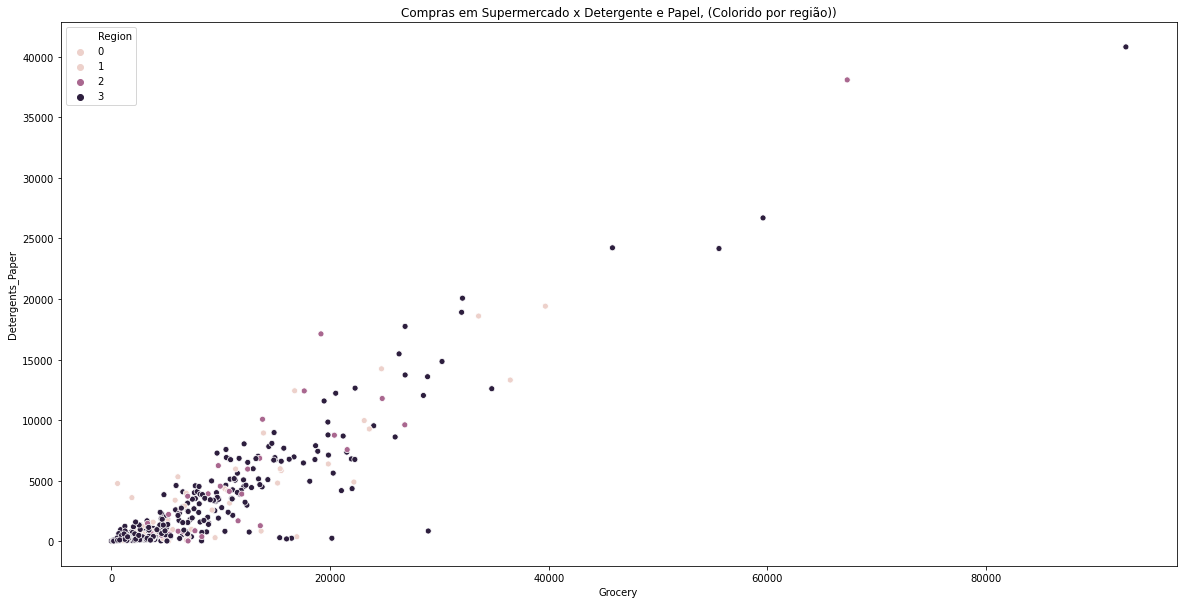

In [24]:
plt.figure(figsize=(20,10))


sns.scatterplot('Grocery', 'Detergents_Paper', hue='Region', data=uci_customers);  #realiza o plot do gráfico de dispersão 
plt.title('Compras em Supermercado x Detergente e Papel, (Colorido por região))'); #adiciona o título ao gráfico

In [25]:
from sklearn.model_selection import train_test_split #utilizada para dividir o dataset entre dados de entrada e saída
from sklearn.linear_model import LinearRegression  #biblioteca que contém o modelo de regressão linear
from sklearn import metrics #utilizada para avaliar o modelo desenvolvido

In [26]:
X = uci_customers['Grocery'].values.reshape(-1,1)  #realiza a modificação dos dados para a entrada do algoritmo (transforma em uma matriz)
y = uci_customers['Detergents_Paper'].values.reshape(-1,1)  #realiza a modificação dos dados para a entrada do algoritmo (transforma em uma matriz)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #dividindo o df em treinamento (80%) e teste (20%)

In [28]:
regressor = LinearRegression() #objeto para a construção do medelo de regressão linear 
regressor.fit(X_train, y_train) #treinamento do algoritmo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

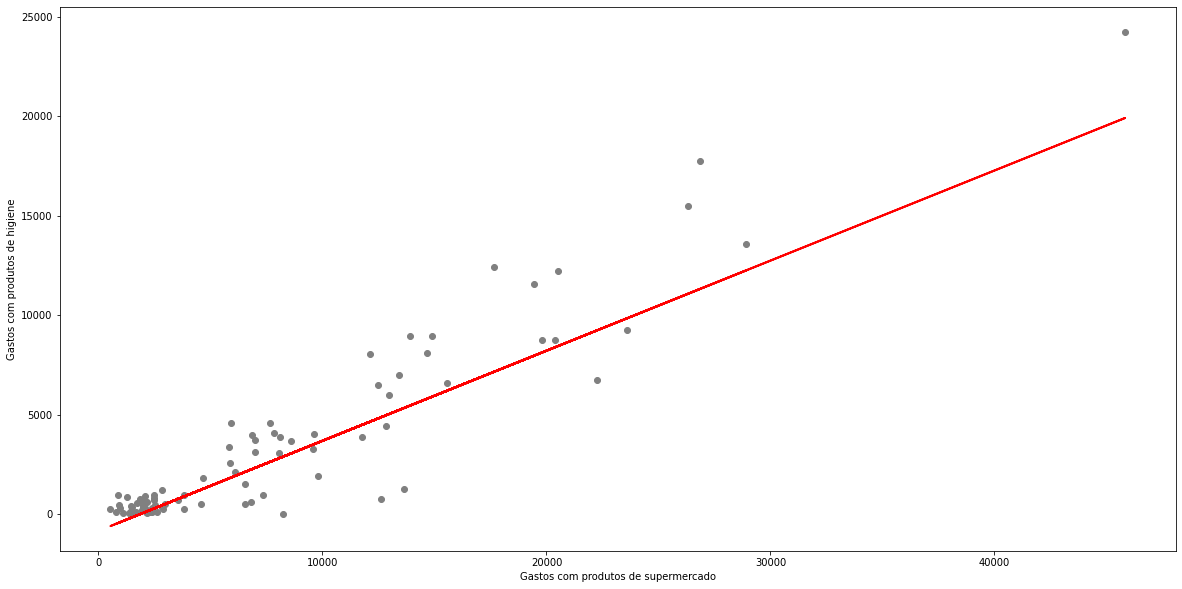

In [29]:
plt.figure(figsize=(20,10))
y_pred = regressor.predict(X_test)  #previsão do modelo de regressão
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Gastos com produtos de supermercado')
plt.ylabel('Gastos com produtos de higiene')
plt.show()

In [30]:
#calculando o coeficiente de determinação R^2 para o modelo
#esse coeficiente explica a porcentagem de variabilidade dos dados em relação a reta do modelo de regressão
from sklearn.metrics import r2_score  #utilizada para calcular o R2
r2_score(y_test,y_pred)

0.847492289734609

In [49]:
#coeficientes da reta
print(f"A equação da reta é Y = {regressor.coef_[0][0]}X {regressor.intercept_[0]}")

A equação da reta é Y = 0.452647967855267X -839.4404680193988


In [50]:
#realizando a previsão de gastos com produtos de higiene dado que o consumidor gastou 25000 com supermercado
regressor.predict(np.array([30000]).reshape(-1,1))

array([[12739.99856764]])

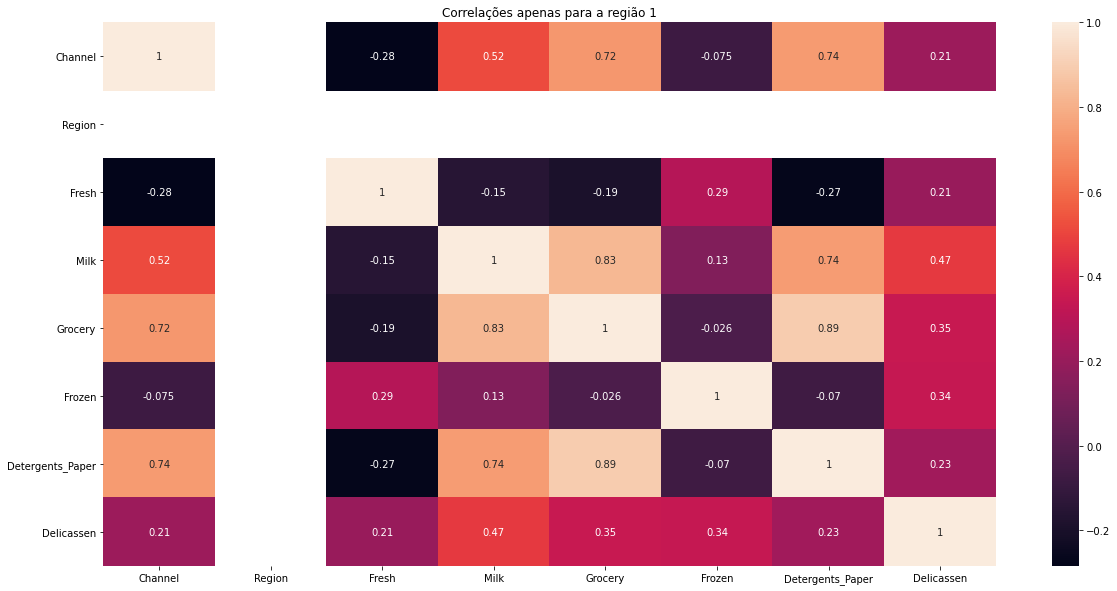

In [33]:
#região 1 - Lisboa
plt.figure(figsize=(20,10))
sns.heatmap(regiao_1.corr(), annot=True); #encontra a matriz de correlação da região 1
plt.title('Correlações apenas para a região 1'); #adiciona o título no gráfico

In [34]:
#biblioteca para realizar a construção do algoritmo não supervisionado K-means
from sklearn.cluster import KMeans

In [57]:
#obtém os dados para a construção do banco de dados apenas com compras de congelados e produtos de limpeza
segmentacao_1 = uci_customers[['Grocery' , 'Detergents_Paper']].iloc[: , :].values #transforma os dados em array
segmentacao_1[:,:]

array([[ 7561,  2674],
       [ 9568,  3293],
       [ 7684,  3516],
       [ 4221,   507],
       [ 7198,  1777],
       [ 5126,  1795],
       [ 6975,  3140],
       [ 9426,  3321],
       [ 6192,  1716],
       [18881,  7425],
       [12974,  5977],
       [ 4523,   549],
       [11757,  3881],
       [14982,  6707],
       [12091,  5058],
       [ 3821,   964],
       [12121,  4508],
       [ 2933,   370],
       [10099,  2767],
       [ 9464,  2518],
       [ 4602,  2259],
       [ 2010,   375],
       [ 4469,  2381],
       [22019,  4337],
       [13792,  4482],
       [ 7595,  4003],
       [ 2861,   242],
       [ 3045,   100],
       [25957,  8604],
       [ 2609,  1107],
       [11107,  2134],
       [ 3133,   820],
       [ 2886,   918],
       [ 7326,   361],
       [ 2262,   483],
       [11091,  4239],
       [ 5428,   862],
       [12477,  6506],
       [16709,  6956],
       [  902,   212],
       [ 4757,  1145],
       [ 5956,  2575],
       [14961,  6899],
       [239

In [36]:
kmeans = KMeans(n_clusters=3) #contrói o modelo para aplicar o algoritmo de clusterização não supervisionado K-means
kmeans.fit(segmentacao_1) #aplica o modelo K-means aos dados
y_kmeans = kmeans.predict(segmentacao_1) #encontra os grupos

Text(0.5, 1.0, 'Segmentação de clientes por gastos com  Produtos de supermercado x Produtos de higiene')

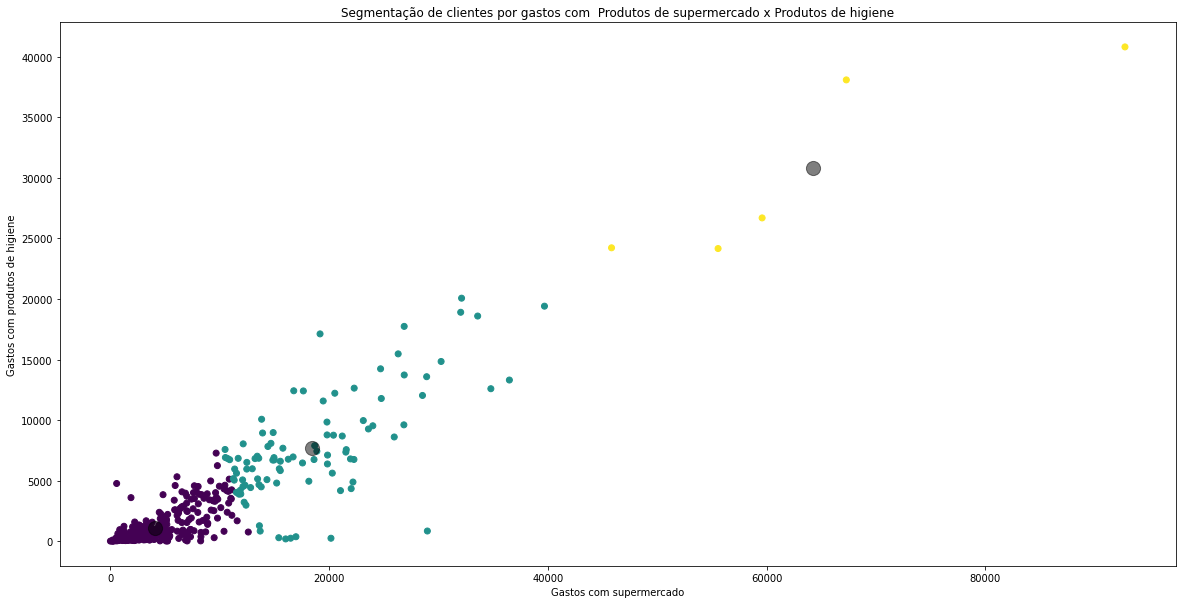

In [58]:
#inicia a construção da figura
plt.figure(figsize = (20 , 10) ) #define o tamanho da figura

plt.scatter(segmentacao_1[:, 0], segmentacao_1[:, 1], c=y_kmeans, cmap='viridis') #constrói o gráfico de dispersão com os grupos
centers = kmeans.cluster_centers_ #encontra os centros de cada um dos grupos
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5) #realiza o plot de cada um dos grupos
plt.xlabel("Gastos com supermercado")  #adiciona o label para o eixo X
plt.ylabel("Gastos com produtos de higiene") #adiciona o label para o eixo Y
plt.title("Segmentação de clientes por gastos com  Produtos de supermercado x Produtos de higiene") #adiciona o título

In [66]:
# tamanho de cada cluster
np.bincount(y_kmeans)

array([338,  97,   5])